In [1]:
import pandas as pd

# URL 1

In [4]:
#Retrieving data from top5 european league players

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"

#url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"

df = pd.read_html(url, attrs={"id": "stats_standard"}) 

#Getting the first item from the list
df = df[0]

#Dropping per 90 stats and creating our own later
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

#Dropping top header that we dont need
df = df.droplevel(0, axis = 1)

#Filtering for position, Forward
#df = df[df['Pos'].str.contains('MF')]
df = df[df['Pos'] == 'MF']

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df = df[df['Min'].astype(int) > 900]

#filtering for competition
df = df[df['Comp'] == 'eng Premier League']

df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
98,96,Edson Álvarez,mx MEX,MF,West Ham,eng Premier League,27-113,1997,19,14,...,8,1,0.3,0.3,0.8,1.1,14,55,14,Matches
118,115,Elliot Anderson,eng ENG,MF,Nott'ham Forest,eng Premier League,22-100,2002,23,19,...,5,0,1.1,1.1,2.8,4.0,32,76,59,Matches
119,116,André,br BRA,MF,Wolves,eng Premier League,23-213,2001,19,17,...,3,0,0.1,0.1,0.5,0.6,5,51,4,Matches
146,142,Joe Aribo,ng NGA,MF,Southampton,eng Premier League,28-208,1996,23,15,...,1,0,2.6,2.6,1.5,4.0,29,56,54,Matches
176,171,Yasin Ayari,se SWE,MF,Brighton,eng Premier League,21-131,2003,20,14,...,3,0,1.4,1.4,1.2,2.6,19,45,51,Matches


In [6]:
df.Comp.unique()

array(['eng Premier League'], dtype=object)

In [8]:
df.Player.count()

55

In [10]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
98,96,Edson Álvarez,mx MEX,MF,West Ham,eng Premier League,27-113,1997,19,14,...,8,1,0.3,0.3,0.8,1.1,14,55,14,Matches
118,115,Elliot Anderson,eng ENG,MF,Nott'ham Forest,eng Premier League,22-100,2002,23,19,...,5,0,1.1,1.1,2.8,4.0,32,76,59,Matches
119,116,André,br BRA,MF,Wolves,eng Premier League,23-213,2001,19,17,...,3,0,0.1,0.1,0.5,0.6,5,51,4,Matches
146,142,Joe Aribo,ng NGA,MF,Southampton,eng Premier League,28-208,1996,23,15,...,1,0,2.6,2.6,1.5,4.0,29,56,54,Matches
176,171,Yasin Ayari,se SWE,MF,Brighton,eng Premier League,21-131,2003,20,14,...,3,0,1.4,1.4,1.2,2.6,19,45,51,Matches
213,206,Carlos Baleba,cm CMR,MF,Brighton,eng Premier League,21-042,2004,20,18,...,7,1,1.3,1.3,0.7,2.0,27,76,17,Matches
299,289,Sander Berge,no NOR,MF,Fulham,eng Premier League,27-000,1998,17,13,...,2,0,0.1,0.1,0.6,0.6,14,62,1,Matches
328,317,Yves Bissouma,ml MLI,MF,Tottenham,eng Premier League,28-168,1996,18,12,...,5,0,0.4,0.4,0.2,0.7,15,66,3,Matches
421,406,Moisés Caicedo,ec ECU,MF,Chelsea,eng Premier League,23-104,2001,24,24,...,6,0,0.6,0.6,2.3,2.8,25,127,26,Matches
423,408,Jens Cajuste,se SWE,MF,Ipswich Town,eng Premier League,25-188,1999,17,14,...,2,0,0.1,0.1,0.3,0.4,16,30,8,Matches


In [12]:
#Casting the data based on the metrics

df[['90s', 'npxG', 'xAG']] = df[['90s', 'npxG', 'xAG']].astype(float)

df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [14]:
#Calculating per 90 metrics

df['goals_per_90'] = df['Gls'] / df['90s']
df['npxG_per_90'] = df['npxG'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['xAG_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [16]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90'],
      dtype='object')

In [18]:
standard_stats = df[['Player', 'Nation', 'Pos', 'Comp', 'Squad', 'Age', 'Min',
                        'progressive_carries_per_90', 
                     'progressive_passes_per_90']]

In [20]:
standard_stats.dtypes

Player                         object
Nation                         object
Pos                            object
Comp                           object
Squad                          object
Age                            object
Min                            object
progressive_carries_per_90    float64
progressive_passes_per_90     float64
dtype: object

In [22]:
standard_stats.head()

,Player,Nation,Pos,Comp,Squad,Age,Min,progressive_carries_per_90,progressive_passes_per_90
98,Edson Álvarez,mx MEX,MF,eng Premier League,West Ham,27-113,1229,1.021898,4.014599
118,Elliot Anderson,eng ENG,MF,eng Premier League,Nott'ham Forest,22-100,1552,1.860465,4.418605
119,André,br BRA,MF,eng Premier League,Wolves,23-213,1312,0.342466,3.493151
146,Joe Aribo,ng NGA,MF,eng Premier League,Southampton,28-208,1465,1.779141,3.435583
176,Yasin Ayari,se SWE,MF,eng Premier League,Brighton,21-131,1267,1.347518,3.191489


# URL 2

In [25]:
url_2 = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'

df2 = pd.read_html(url_2, attrs={"id": "stats_possession"}) 

#Getting the first item from the list
df2 = df2[0]

#Dropping per 90 stats and creating our own later
df2 = df2[df2.columns.drop(list(df2.filter(regex='Per 90')))]

#Dropping top header that we dont need
df2 = df2.droplevel(0, axis = 1)

#Filtering for position, Forward
df2 = df2[df2['Pos'] == 'MF']

df2 = df2[df2['Comp'] == 'eng Premier League']

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
#df = df[df['Min'].astype(int) > 900]

df2.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,...,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR,Matches
26,26,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,26-000,1999,9.6,541,...,1163,513,7,11,1,12,7,278,4,Matches
41,41,Asher Agbinone,eng ENG,MF,Crystal Palace,eng Premier League,19-139,2005,0.1,8,...,53,23,2,0,0,0,1,5,1,Matches
78,76,Carlos Alcaraz,ar ARG,MF,Southampton,eng Premier League,22-076,2002,0.1,17,...,112,98,4,1,0,0,0,12,1,Matches
98,96,Edson Álvarez,mx MEX,MF,West Ham,eng Premier League,27-113,1997,13.7,835,...,2500,1149,14,13,2,19,11,554,14,Matches
118,115,Elliot Anderson,eng ENG,MF,Nott'ham Forest,eng Premier League,22-100,2002,17.2,1010,...,2838,1372,32,23,12,38,22,587,59,Matches


In [27]:
df2.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen',
       'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist',
       'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR',
       'Matches'],
      dtype='object')

In [45]:
#Casting the data based on the metrics

df2[['90s']] = df2[['90s']].astype(float)

df2[['Touches', 'Def 3rd', 'Mid 3rd', 'Att 3rd', '1/3', 'Mis', 'Dis']] = df2[['Touches', 'Def 3rd', 'Mid 3rd', 'Att 3rd', '1/3', 'Mis', 'Dis']].astype(int)

In [47]:
df2.dtypes

Rk          object
Player      object
Nation      object
Pos         object
Squad       object
Comp        object
Age         object
Born        object
90s        float64
Touches      int64
Def Pen     object
Def 3rd      int64
Mid 3rd      int64
Att 3rd      int64
Att Pen     object
Live        object
Att         object
Succ        object
Succ%       object
Tkld        object
Tkld%       object
Carries     object
TotDist     object
PrgDist     object
PrgC        object
1/3          int64
CPA         object
Mis          int64
Dis          int64
Rec         object
PrgR        object
Matches     object
dtype: object

In [49]:
#Calculating per 90 metrics

df2['touches_per_90'] = df2['Touches'] / df2['90s']
df2['touches_def_per_90'] = df2['Def 3rd'] / df2['90s']
df2['touches_mid_per_90'] = df2['Mid 3rd'] / df2['90s']
df2['touches_att_per_90'] = df2['Att 3rd'] / df2['90s']
df2['carries_final_third_per_90'] = df2['1/3'] / df2['90s']
df2['mis_per_90'] = df2['Mis'] / df2['90s']
df2['dis_per_90'] = df2['Dis'] / df2['90s']

In [51]:
df2.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen',
       'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist',
       'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'Matches',
       'touches_per_90', 'touches_def_per_90', 'touches_mid_per_90',
       'touches_att_per_90', 'carries_final_third_per_90', 'mis_per_90',
       'dis_per_90'],
      dtype='object')

In [53]:
stats_poss = df2[['Player', 'touches_per_90', 'touches_def_per_90', 'touches_mid_per_90',
       'touches_att_per_90', 'carries_final_third_per_90', 'mis_per_90',
       'dis_per_90']]

In [13]:
#stats_poss[['GCA90', 'SCA90']] = gca_stats[['GCA90', 'SCA90']].astype(float)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_49123/45896133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gca_stats[['GCA90', 'SCA90']] = gca_stats[['GCA90', 'SCA90']].astype(float)


In [55]:
stats_poss

,Player,touches_per_90,touches_def_per_90,touches_mid_per_90,touches_att_per_90,carries_final_third_per_90,mis_per_90,dis_per_90
26,Tyler Adams,56.354167,14.791667,31.666667,10.520833,1.145833,1.250000,0.729167
41,Asher Agbinone,80.000000,0.000000,20.000000,60.000000,0.000000,0.000000,10.000000
78,Carlos Alcaraz,170.000000,10.000000,80.000000,90.000000,10.000000,0.000000,0.000000
98,Edson Álvarez,60.948905,18.759124,33.357664,9.343066,0.948905,1.386861,0.802920
118,Elliot Anderson,58.720930,14.360465,25.872093,19.534884,1.337209,2.209302,1.279070
...,...,...,...,...,...,...,...,...
2674,Mats Wieffer,79.038462,18.653846,47.500000,14.038462,1.153846,1.346154,1.346154
2686,Harry Winks,65.246914,15.987654,41.481481,8.641975,0.740741,0.740741,0.493827
2687,Ben Winterburn,20.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000
2706,Ryan Yates,48.827160,12.530864,23.518519,13.209877,0.864198,1.111111,1.049383


# URL 3

In [57]:
url_3 = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'

df3 = pd.read_html(url_3, attrs={"id": "stats_defense"}) 

#Getting the first item from the list
df3 = df3[0]

#Dropping per 90 stats and creating our own later
df3 = df3[df3.columns.drop(list(df3.filter(regex='Per 90')))]

#Dropping top header that we dont need
df3 = df3.droplevel(0, axis = 1)

#Filtering for position, Forward
df3 = df3[df3['Pos'] == 'MF']

df3 = df3[df3['Comp'] == 'eng Premier League']

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
#df = df[df['Min'].astype(int) > 900]

df3.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
26,26,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,26-000,1999,9.6,42,...,53.3,14,10,3,7,24,66,25,0,Matches
41,41,Asher Agbinone,eng ENG,MF,Crystal Palace,eng Premier League,19-139,2005,0.1,2,...,NaN,0,0,0,0,0,2,0,0,Matches
78,76,Carlos Alcaraz,ar ARG,MF,Southampton,eng Premier League,22-076,2002,0.1,0,...,NaN,0,0,0,0,1,1,0,0,Matches
98,96,Edson Álvarez,mx MEX,MF,West Ham,eng Premier League,27-113,1997,13.7,34,...,50.0,15,19,7,12,13,47,29,1,Matches
118,115,Elliot Anderson,eng ENG,MF,Nott'ham Forest,eng Premier League,22-100,2002,17.2,57,...,53.3,28,30,5,25,17,74,41,2,Matches


In [59]:
df3.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',
       'Matches'],
      dtype='object')

In [61]:
#Casting the data based on the metrics

df3[['90s']] = df3[['90s']].astype(float)

df3[['Def 3rd', 'Mid 3rd', 'Int', 'Tkl+Int', 'Clr']] = df3[['Def 3rd', 'Mid 3rd', 'Int', 'Tkl+Int', 'Clr']].astype(int)

In [65]:
#Calculating per 90 metrics

df3['tackles_def_per_90'] = df3['Def 3rd'] / df3['90s']
df3['tackles_mid_per_90'] = df3['Mid 3rd'] / df3['90s']
df3['int_per_90'] = df3['Int'] / df3['90s']
df3['tack_int_per_90'] = df3['Tkl+Int'] / df3['90s']
df3['clear_per_90'] = df3['Clr'] / df3['90s']

In [69]:
df3.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',
       'Matches', 'tackles_def_per_90', 'tackles_mid_per_90', 'int_per_90',
       'tack_int_per_90', 'clear_per_90'],
      dtype='object')

In [71]:
stats_def = df3[['Player', 'tackles_def_per_90', 'tackles_mid_per_90', 'int_per_90',
       'tack_int_per_90', 'clear_per_90']]

In [19]:
#stats_def[['Sh/90', 'SoT/90']] = shot_stats[['Sh/90', 'SoT/90']].astype(float)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_49123/3799132011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_stats[['Sh/90', 'SoT/90']] = shot_stats[['Sh/90', 'SoT/90']].astype(float)


In [73]:
stats_def.head()

,Player,tackles_def_per_90,tackles_mid_per_90,int_per_90,tack_int_per_90,clear_per_90
26,Tyler Adams,1.562500,2.395833,2.500000,6.875000,2.604167
41,Asher Agbinone,0.000000,20.000000,0.000000,20.000000,0.000000
78,Carlos Alcaraz,0.000000,0.000000,10.000000,10.000000,0.000000
98,Edson Álvarez,1.313869,0.729927,0.948905,3.430657,2.116788
118,Elliot Anderson,2.034884,0.930233,0.988372,4.302326,2.383721


# Url 4

In [138]:
url_4 = 'https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats'

df4 = pd.read_html(url_4, attrs={"id": "stats_misc"}) 

#Getting the first item from the list
df4 = df4[0]

#Dropping per 90 stats and creating our own later
df4 = df4[df4.columns.drop(list(df4.filter(regex='Per 90')))]

#Dropping top header that we dont need
df4 = df4.droplevel(0, axis = 1)

#Filtering for position, Forward
df4 = df4[df4['Pos'] == 'MF']

df4 = df4[df4['Comp'] == 'eng Premier League']

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
#df = df[df['Min'].astype(int) > 900]

df4.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,CrdY,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches
26,26,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,26-000,1999,9.6,4,...,24,29,0,1,0,44,15,8,65.2,Matches
41,41,Asher Agbinone,eng ENG,MF,Crystal Palace,eng Premier League,19-139,2005,0.1,0,...,0,1,0,0,0,0,0,1,0.0,Matches
78,76,Carlos Alcaraz,ar ARG,MF,Southampton,eng Premier League,22-076,2002,0.1,0,...,1,0,0,0,0,2,1,0,100.0,Matches
98,96,Edson Álvarez,mx MEX,MF,West Ham,eng Premier League,27-113,1997,13.7,8,...,13,19,0,0,0,69,18,14,56.3,Matches
118,115,Elliot Anderson,eng ENG,MF,Nott'ham Forest,eng Premier League,22-100,2002,17.2,5,...,17,38,0,0,0,123,24,12,66.7,Matches


In [142]:
df4.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW',
       'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%', 'Matches'],
      dtype='object')

In [150]:
#Casting the data based on the metrics

df4[['90s', 'Won%']] = df4[['90s', 'Won%']].astype(float)

df4[['Recov']] = df4[['Recov']].astype(int)

In [156]:
#Calculating per 90 metrics

df4['aerials_won_%'] = df4['Won%']
df4['recoveries_per_90'] = df4['Recov'] / df4['90s']

In [178]:
stats_mis = df4[['Player','recoveries_per_90', 'aerials_won_%']]

In [180]:
stats_mis.head()

,Player,recoveries_per_90,aerials_won_%
26,Tyler Adams,4.583333,65.2
41,Asher Agbinone,0.000000,0.0
78,Carlos Alcaraz,20.000000,100.0
98,Edson Álvarez,5.036496,56.3
118,Elliot Anderson,7.151163,66.7


# Merge

In [75]:
merged_df = standard_stats.merge(stats_poss, on='Player', how='inner')

merged_df.head()

,Player,Nation,Pos,Comp,Squad,Age,Min,progressive_carries_per_90,progressive_passes_per_90,touches_per_90,touches_def_per_90,touches_mid_per_90,touches_att_per_90,carries_final_third_per_90,mis_per_90,dis_per_90
0,Edson Álvarez,mx MEX,MF,eng Premier League,West Ham,27-113,1229,1.021898,4.014599,60.948905,18.759124,33.357664,9.343066,0.948905,1.386861,0.802920
1,Elliot Anderson,eng ENG,MF,eng Premier League,Nott'ham Forest,22-100,1552,1.860465,4.418605,58.720930,14.360465,25.872093,19.534884,1.337209,2.209302,1.279070
2,André,br BRA,MF,eng Premier League,Wolves,23-213,1312,0.342466,3.493151,53.219178,16.369863,32.397260,4.726027,0.547945,0.958904,0.753425
3,Joe Aribo,ng NGA,MF,eng Premier League,Southampton,28-208,1465,1.779141,3.435583,54.785276,11.717791,29.141104,14.478528,1.226994,1.165644,0.797546
4,Yasin Ayari,se SWE,MF,eng Premier League,Brighton,21-131,1267,1.347518,3.191489,56.382979,12.907801,28.368794,16.028369,0.851064,1.843972,1.276596


In [77]:
merged_df = merged_df.merge(stats_def, on='Player', how='inner')

In [79]:
merged_df.columns

Index(['Player', 'Nation', 'Pos', 'Comp', 'Squad', 'Age', 'Min',
       'progressive_carries_per_90', 'progressive_passes_per_90',
       'touches_per_90', 'touches_def_per_90', 'touches_mid_per_90',
       'touches_att_per_90', 'carries_final_third_per_90', 'mis_per_90',
       'dis_per_90', 'tackles_def_per_90', 'tackles_mid_per_90', 'int_per_90',
       'tack_int_per_90', 'clear_per_90'],
      dtype='object')

In [81]:
merged_df.Player.count()

55

In [83]:
merged_df.head()

,Player,Nation,Pos,Comp,Squad,Age,Min,progressive_carries_per_90,progressive_passes_per_90,touches_per_90,...,touches_mid_per_90,touches_att_per_90,carries_final_third_per_90,mis_per_90,dis_per_90,tackles_def_per_90,tackles_mid_per_90,int_per_90,tack_int_per_90,clear_per_90
0,Edson Álvarez,mx MEX,MF,eng Premier League,West Ham,27-113,1229,1.021898,4.014599,60.948905,...,33.357664,9.343066,0.948905,1.386861,0.802920,1.313869,0.729927,0.948905,3.430657,2.116788
1,Elliot Anderson,eng ENG,MF,eng Premier League,Nott'ham Forest,22-100,1552,1.860465,4.418605,58.720930,...,25.872093,19.534884,1.337209,2.209302,1.279070,2.034884,0.930233,0.988372,4.302326,2.383721
2,André,br BRA,MF,eng Premier League,Wolves,23-213,1312,0.342466,3.493151,53.219178,...,32.397260,4.726027,0.547945,0.958904,0.753425,1.643836,1.438356,1.232877,4.657534,1.575342
3,Joe Aribo,ng NGA,MF,eng Premier League,Southampton,28-208,1465,1.779141,3.435583,54.785276,...,29.141104,14.478528,1.226994,1.165644,0.797546,0.490798,0.981595,0.797546,2.576687,1.288344
4,Yasin Ayari,se SWE,MF,eng Premier League,Brighton,21-131,1267,1.347518,3.191489,56.382979,...,28.368794,16.028369,0.851064,1.843972,1.276596,0.780142,1.560284,0.921986,3.758865,1.134752


In [184]:
merged_df.columns

Index(['Player', 'Nation', 'Pos', 'Comp', 'Squad', 'Age', 'Min',
       'progressive_carries_per_90', 'progressive_passes_per_90',
       'touches_per_90', 'touches_def_per_90', 'touches_mid_per_90',
       'touches_att_per_90', 'carries_final_third_per_90', 'mis_per_90',
       'dis_per_90', 'tackles_def_per_90', 'tackles_mid_per_90', 'int_per_90',
       'tack_int_per_90', 'clear_per_90', 'Touches', 'Touches Def',
       'Touches Mid', 'Touches Att', 'Prog Carries', 'Carries into 1/3',
       'Prog Passes', 'Miscontrols', 'Dispossessed', 'Tackles Def',
       'Tackles Mid', 'Interceptions', 'Tack + Int', 'Clearences',
       'recoveries_per_90', 'aerials_won_%'],
      dtype='object')

In [182]:
merged_df = merged_df.merge(stats_mis, on='Player', how='inner')

# Radar

In [218]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

#Percentiles calculation 

merged_df['Touches'] = (merged_df['touches_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Touches Def'] = (merged_df['touches_def_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Touches Mid'] = (merged_df['touches_mid_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Touches Att'] = (merged_df['touches_att_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Carries'] = (merged_df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Carries into 1/3'] = (merged_df['carries_final_third_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Passes'] = (merged_df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Miscontrols'] = ((1 - merged_df['mis_per_90'].rank(pct=True)) * 100).astype(int)
merged_df['Dispossessed'] = ((1 - merged_df['dis_per_90'].rank(pct=True)) * 100).astype(int)
merged_df['Tackles Def'] = (merged_df['tackles_def_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Tackles Mid'] = (merged_df['tackles_mid_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Interceptions'] = (merged_df['int_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Tack + Int'] = (merged_df['tack_int_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Clearences'] = (merged_df['clear_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Ball Recoveries'] = (merged_df['recoveries_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Aerials Won %'] = (merged_df['aerials_won_%'].rank(pct=True) * 100).astype(int)

#Filtering and sorting which columns to use in radar
columns_to_plot = [
    'Touches', 'Touches Def', 'Touches Mid', 'Touches Att',
    'Miscontrols', 'Dispossessed', 'Prog Carries',
    'Carries into 1/3', 'Prog Passes', 'Tackles Def', 'Tackles Mid',
    'Interceptions', 'Tack + Int', 'Clearences', 'Ball Recoveries',
    'Aerials Won %'
]

#Creating min and max value for radar
radar = Radar(
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range=[100 for _ in columns_to_plot]
)

slice_colors = ["#c8102E"] * 6 + ["#00B2A9"] * 3 + ["#F6EB61"] * 7
#text_colors = ["white"]*9

#004170  #ceab5d   #DA291C

#Players to plot
baleba = merged_df[merged_df['Player'] == 'Carlos Baleba']
caicedo = merged_df[merged_df['Player'] == 'Moisés Caicedo']
gravenberch = merged_df[merged_df['Player'] == 'Ryan Gravenberch']


#retegui = merged_df[merged_df['Player'] == 'Mateo Retegui']
#dembele = merged_df[merged_df['Player'] == 'Ousmane Dembélé']
#emegha = merged_df[merged_df['Player'] == 'Emanuel Emegha']


<Axes: >

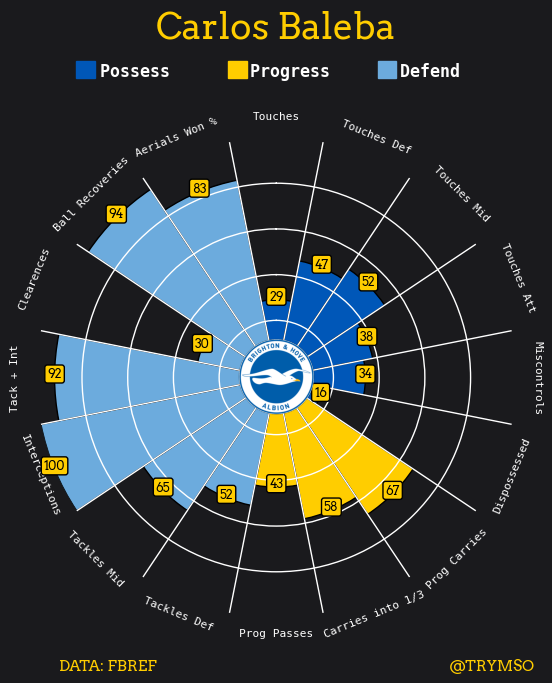

In [210]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(baleba[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#FFCD00',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=8,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Carlos Baleba', fontsize=26, weight='bold', c='#FFCD00', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#FFCD00',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#FFCD00',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Possess        Progress       Defend", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.023, 0.021, fill=True, color="#0057B8",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.44, 0.875), 0.023, 0.021, fill=True, color="#FFCD00",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.627, 0.875), 0.023, 0.021, fill=True, color="#6CABDD",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/brighton_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)


In [212]:
fig.savefig('/Users/Trymso/Desktop/baleba1_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

<Axes: >

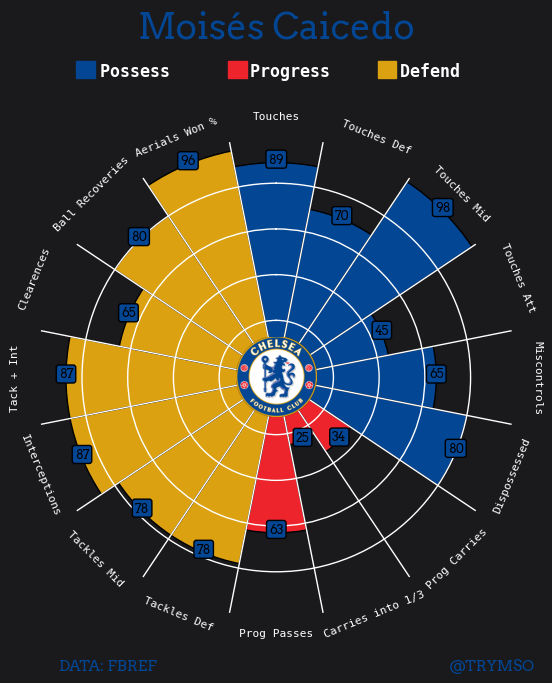

In [198]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(caicedo[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#034694',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=8,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Moisés Caicedo', fontsize=26, weight='bold', c='#034694', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#034694',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#034694',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Possess        Progress       Defend", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.023, 0.021, fill=True, color="#034694",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.44, 0.875), 0.023, 0.021, fill=True, color="#ee242c",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.627, 0.875), 0.023, 0.021, fill=True, color="#dba111",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/chelsea_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)


In [200]:
fig.savefig('/Users/Trymso/Desktop/caicedo1_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

<Axes: >

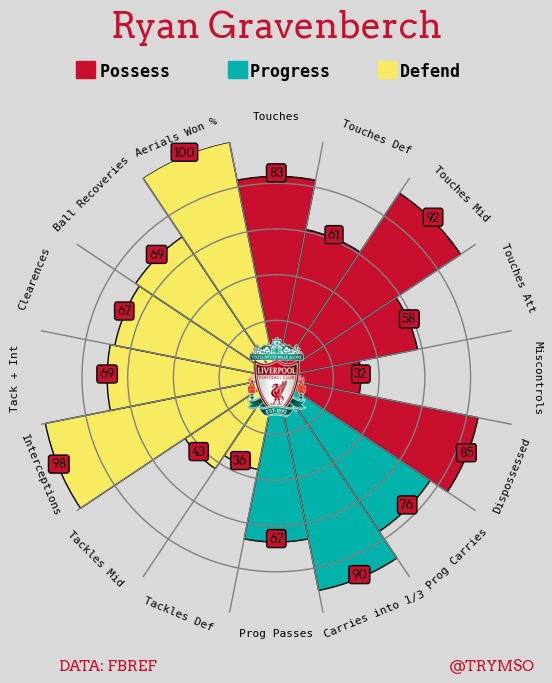

In [234]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#d9d9d9',
    straight_line_color='grey',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='grey',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(gravenberch[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#c8102E',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='black',  # White color for the labels (change as needed)
        fontsize=8,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Ryan Gravenberch', fontsize=26, weight='bold', c='#c8102E', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#c8102E',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#c8102E',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Possess        Progress       Defend", size=12,
    fontproperties='monospace', weight='bold', color="black"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.023, 0.021, fill=True, color="#c8102E",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.44, 0.875), 0.023, 0.021, fill=True, color="#00B2A9",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.627, 0.875), 0.023, 0.021, fill=True, color="#F6EB61",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/liverpool.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)


In [236]:
fig.savefig('/Users/Trymso/Desktop/graven_radar1.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

<Axes: >

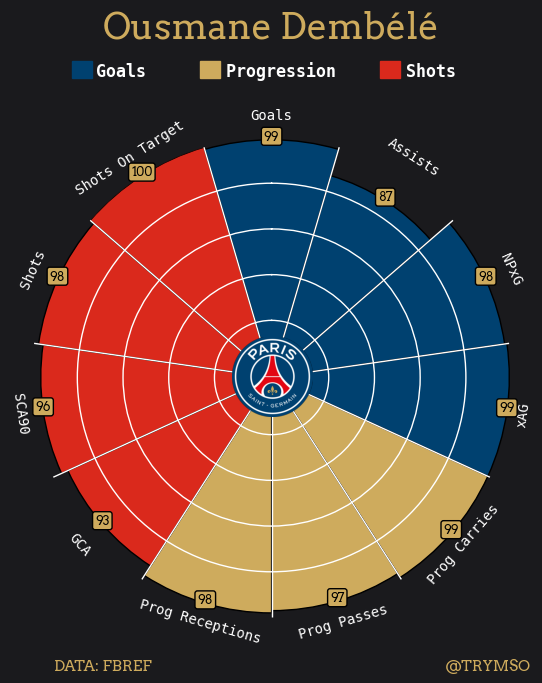

In [42]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(dembele[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#ceab5d',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Ousmane Dembélé', fontsize=26, weight='bold', c='#ceab5d', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#ceab5d',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#ceab5d',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Shots", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#004170",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#ceab5d",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#DA291C",
        transform=fig.transFigure, figure=fig
    ),
])
        

# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/psg_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [44]:
fig.savefig('/Users/Trymso/Desktop/dembele_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

In [ ]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(emegha[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#DC2F34',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Emanuel Emegha', fontsize=26, weight='bold', c='#DC2F34', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#DC2F34',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#DC2F34',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Shots", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#009FE3",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#DC2F34",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#004996",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/stras_logo.png"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [ ]:
fig.savefig('/Users/Trymso/Desktop/emegha_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop